## Code from : [Here](http://www.deepideas.net/deep-learning-from-scratch-vi-tensorflow/)

In [1]:
import tensorflow as tf

C:\Users\Pragyaditya Das\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
red_points = np.concatenate((
    0.2*np.random.randn(25, 2) + np.array([[0, 0]]*25),
    0.2*np.random.randn(25, 2) + np.array([[1, 1]]*25)
))

In [5]:
blue_points = np.concatenate((
    0.2*np.random.randn(25, 2) + np.array([[0, 1]]*25),
    0.2*np.random.randn(25, 2) + np.array([[1, 0]]*25)
))

In [6]:
X = tf.placeholder(dtype=tf.float64)

In [7]:
c = tf.placeholder(dtype=tf.float64)

In [8]:
W_hidden = tf.Variable(np.random.randn(2, 2))
b_hidden = tf.Variable(np.random.randn(2))
p_hidden = tf.sigmoid( tf.add(tf.matmul(X, W_hidden), b_hidden) )

In [9]:
W_output = tf.Variable(np.random.randn(2, 2))
b_output = tf.Variable(np.random.randn(2))
p_output = tf.nn.softmax( tf.add(tf.matmul(p_hidden, W_output), b_output) )

In [10]:
J = tf.negative(tf.reduce_sum(tf.reduce_sum(tf.multiply(c, tf.log(p_output)), axis=1)))

In [11]:
minimization_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(J)

In [12]:
feed_dict = {
    X: np.concatenate((blue_points, red_points)),
    c:
        [[1, 0]] * len(blue_points)
        + [[0, 1]] * len(red_points)

}


In [13]:
session = tf.Session()

In [14]:
session.run(tf.global_variables_initializer())

In [15]:
for step in range(1000):
    J_value = session.run(J, feed_dict)
    if step % 100 == 0:
        print("Step:", step, " Loss:", J_value)
    session.run(minimization_op, feed_dict)

Step: 0  Loss: 167.48540280320876
Step: 100  Loss: 53.48497699847397
Step: 200  Loss: 46.53247264405475
Step: 300  Loss: 43.598379728406044
Step: 400  Loss: 42.06238576609746
Step: 500  Loss: 41.1121831692167
Step: 600  Loss: 40.46292445579111
Step: 700  Loss: 39.99108201268377
Step: 800  Loss: 39.63328117829823
Step: 900  Loss: 39.353117514923525


In [16]:
W_hidden_value = session.run(W_hidden)
print("Hidden layer weight matrix:\n", W_hidden_value)
b_hidden_value = session.run(b_hidden)
print("Hidden layer bias:\n", b_hidden_value)
W_output_value = session.run(W_output)
print("Output layer weight matrix:\n", W_output_value)
b_output_value = session.run(b_output)
print("Output layer bias:\n", b_output_value)

Hidden layer weight matrix:
 [[ 6.84262636 -8.82052413]
 [-2.06804384 -4.7737689 ]]
Hidden layer bias:
 [0.6958847  1.62059531]
Output layer weight matrix:
 [[-3.74736796  2.41300009]
 [-4.96169958  4.92172086]]
Output layer bias:
 [ 4.29394024 -1.9125693 ]


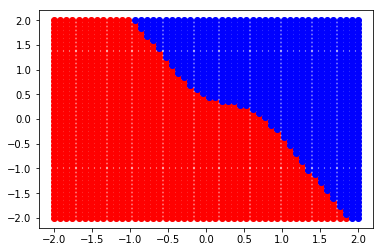

In [17]:
xs = np.linspace(-2, 2)
ys = np.linspace(-2, 2)
pred_classes = []
for x in xs:
    for y in ys:
        pred_class = session.run(p_output,
                              feed_dict={X: [[x, y]]})[0]
        pred_classes.append((x, y, pred_class.argmax()))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for x, y, c in pred_classes:
    if c == 0:
        xs_n.append(x)
        ys_n.append(y)
    else:
        xs_p.append(x)
        ys_p.append(y)
plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')